In [1]:
import pandas as pd
import matplotlib.pyplot as plt

форма обуч набора X: (3286, 43)
форма обуч набора X c l1: (3286, 22)
[(0, 'Age'), (1, 'DistanceFromHome'), (2, 'Education'), (3, 'EmployeeCount'), (4, 'EmployeeID'), (5, 'JobLevel'), (6, 'MonthlyIncome'), (7, 'NumCompaniesWorked'), (8, 'PercentSalaryHike'), (9, 'StandardHours'), (10, 'StockOptionLevel'), (11, 'TotalWorkingYears'), (12, 'TrainingTimesLastYear'), (13, 'YearsAtCompany'), (14, 'YearsSinceLastPromotion'), (15, 'YearsWithCurrManager'), (16, 'BusinessTravel_Non-Travel'), (17, 'BusinessTravel_Travel_Frequently'), (18, 'BusinessTravel_Travel_Rarely'), (19, 'Department_Human Resources'), (20, 'Department_Research & Development'), (21, 'Department_Sales'), (22, 'EducationField_Human Resources'), (23, 'EducationField_Life Sciences'), (24, 'EducationField_Marketing'), (25, 'EducationField_Medical'), (26, 'EducationField_Other'), (27, 'EducationField_Technical Degree'), (28, 'Gender_Female'), (29, 'Gender_Male'), (30, 'JobRole_Healthcare Representative'), (31, 'JobRole_Human Resourc

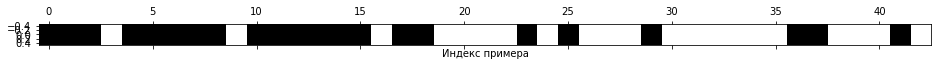

In [12]:
raw_data = pd.read_csv('HR-аналитика.csv')
raw_data.dropna(inplace=True)


data_dummies = pd.get_dummies(raw_data)
data_dummies.drop('Attrition_No',inplace=True,axis=1)

data = data_dummies.copy()

y = data['Attrition_Yes'].copy()
data.drop('Attrition_Yes',inplace=True,axis=1)
x = data.copy()
x_fr = data.copy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42,),threshold="median")

select.fit(x_train, y_train)
x_train_l1 = select.transform(x_train)
print("форма обуч набора X: {}".format(x_train.shape))
print("форма обуч набора X c l1: {}".format(x_train_l1.shape))
 
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")
print(list(enumerate(x_train.columns)))

Text(0.5, 0, 'Индекс примера')

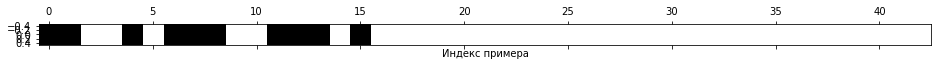

In [9]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=10)
select.fit(x_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")
print(list(enumerate(x_train.columns)))

In [24]:
#Фичи: 0,1,4,6,7,8,11,12,13,15
x_new=pd.DataFrame()
for i in [0,1,4,6,7,8,11,12,13,15]:
    x_new[i] = x_fr.iloc[:,i]

from sklearn.linear_model import LogisticRegression
    
logreg = LogisticRegression().fit(x_train, y_train)
logreg.score(x_test,y_test)

C:\PROGRAMS\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8111313868613139